## Basic ODE Solver Example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### Define the Solver

In [10]:
def ode(f, y0, t) :
    nsteps = len(t) - 1
    y = np.zeros(nsteps+1)
    y[0] = y0
    
    for k in range(nsteps) :
        Δt = t[k+1] - t[k]
        y[k+1] = y[k] + Δt*f(y[k],t[k])
    
    return y

### Define the rhs function in $dy/dt = f(y,t)$

In [11]:
def frhs(y, t) : 
    return -y

### Run the solver and plot the result

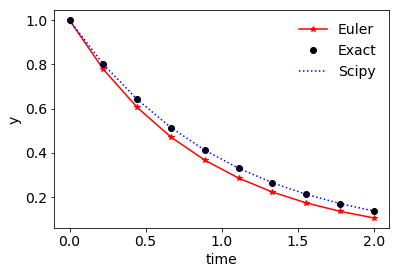

In [15]:

t = np.linspace(0,2,10)            # define the times to solve at
y0 = 1                             # initial condition

y   = ode(   frhs, y0, t)          # solve the problem (find y(t))
ysp = odeint(frhs, y0, t)          # compare to the built-in Scipy solver       

#-------------- plot the results

plt.rc('font', size=14)
plt.plot(t,y,'r*-',label='Euler')  
plt.plot(t,y0*np.exp(-t),'ko',label='Exact')
plt.plot(t,ysp,'b:',label='Scipy')
lg = plt.legend(); lg.draw_frame(False)
plt.xlabel('time')
plt.ylabel('y');